<a href="https://colab.research.google.com/github/Loris997/Assignment/blob/main/Kopie_von_questions_chapter2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kc_house_data (1).csv")

data.head(10)

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?


Machine learning pipeline: A sequence of data processing components. 
The example is a supervised learning task, the price to the house is given.
We try to predict the house prices (numeric value), therefore it is a regression task. 
We do have all the data at the moment and there is no change in sight, so it is batch learning. 
Performance measure is used to evaluate, how good a model performs. 
Mean squared Error: average squared distance between the predicted values and the actual values.
R-squared: proportion of the variance in the dependent variable. 


##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

Id - numeric, 
Date - numeric, 
Price - numeric, 
Bedrooms - numeric, 
Bathrooms - numeric,  
sqft_living - numeric, 
sqft_lot - numeric, 
floors - numeric, 
waterfront - categorial, 
view - categorial, 
condition - ordinal, 
grade - ordinal, 
sqft_above - numeric, 
sqft_basement - numeric, 
yr_built - numeric, 
yr_renovated - numeric, 
zipcode - categorial, 
lat - numeric, 
long - numeric

The variable waterfront is either 0 (yes) or 1 (no)(Boolan), the variable yr_renovated is either 0 (not renovated) or the year it was renovated. 


In [2]:
# YOUR TASK
data.value_counts()

date             price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long    
20140502T000000  235000.0   2         1.00       1210         9400      1.0     0           0     2          6      1210        0              1949      0             98106    47.5342  -122.360    1
20141223T000000  1130000.0  4         3.00       3180         4649      2.0     0           0     4          9      2070        1110           1925      0             98105    47.6583  -122.273    1
20141224T000000  255000.0   3         1.50       1110         10296     1.0     0           0     5          7      1110        0              1964      0             98042    47.4220  -122.153    1
                                      1.00       1580         8206      1.0     0           0     3          7      1100        480            1962      0             98198    47.3676  -122.312    1
          

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

Left-skewed: yr_built, lat

Right-skewed: long, zipcode, sqft_above 

It is left skewed, if the peak is close to the y axis and then “slowly” falls down. It is right skewed, if it starts small close to the y axis and then rises the further away of the axis it goes (to the peak). 
yr_renovated is either 0 if not renovated, or set to the year where it was renovated. 

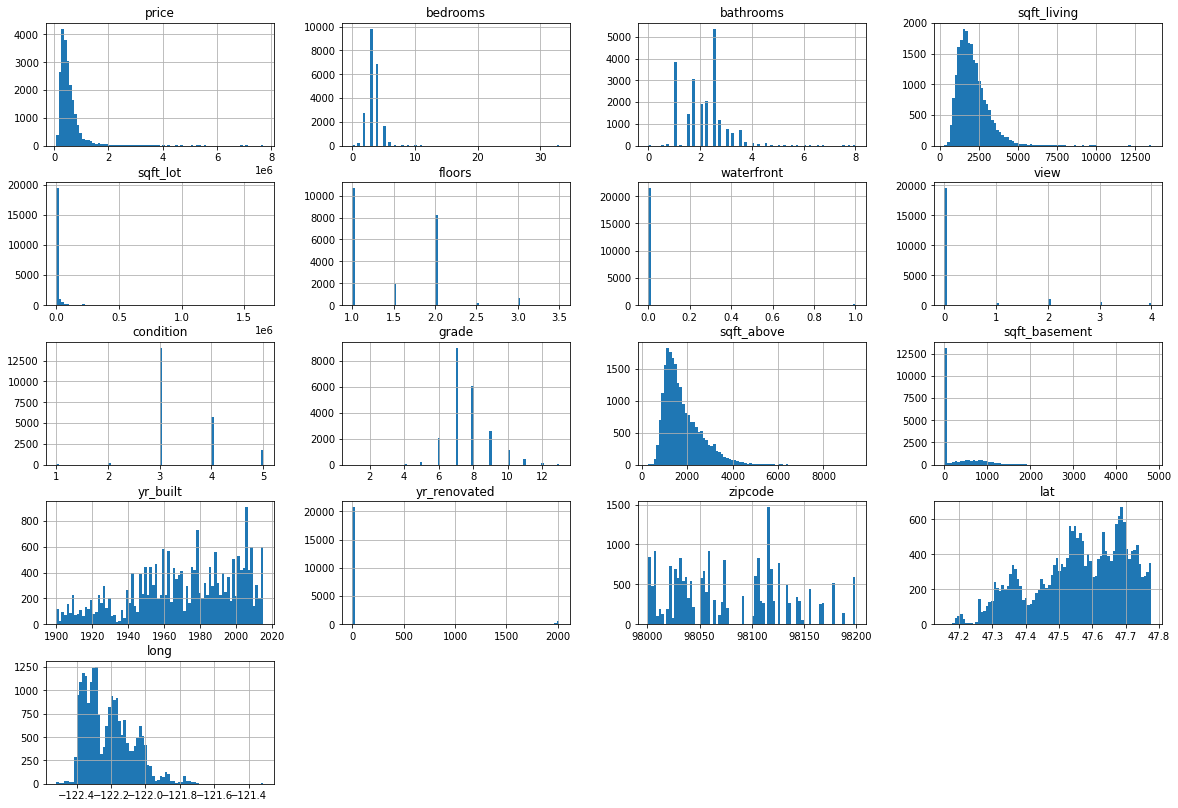

In [3]:
# YOUR TASK
data.hist(bins=80, figsize=(20, 14))
plt.show()

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [4]:
# Some Data Cleaning

data['date'] = pd.to_datetime(data['date'])
data['renovated'] = pd.cut(data['yr_renovated'], bins=[-float("inf"), 0, float("inf")], labels=[0, 1])
data['yr_renovated'] = data[['yr_renovated', 'yr_built']].max(axis=1)

##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

Stratified sampling is, when the population is divided into homogenous subgroups called strata. From each stratum a number of instances are sampled to guarantee that the test set is representative of the overall population. 

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

data["price_cat"] = pd.cut(np.log(data["price"]), bins=20, labels=range(1,21))

train_set, test_set = train_test_split(data, test_size=0.2, stratify=data["price_cat"], random_state=50)




In [7]:
data = train_set.copy()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_cat
18474,2015-03-17,552700.0,2,1.00,1100,2800,1.0,0,0,3,7,1100,0,1925,1925,98119,47.6361,-122.371,0,9
6968,2014-08-20,299000.0,4,2.00,2320,12000,1.0,0,0,3,7,1720,600,1943,2014,98108,47.5246,-122.325,1,6
3800,2014-05-14,582500.0,2,1.50,1159,4800,1.0,0,0,3,7,1159,0,1948,1948,98199,47.6592,-122.399,0,9
17648,2014-11-12,805000.0,4,2.50,3960,38615,2.0,0,0,3,10,3960,0,2000,2000,98077,47.7249,-122.024,0,11
18242,2015-01-23,480000.0,2,1.00,710,4800,1.0,0,0,2,6,710,0,1950,1950,98112,47.6212,-122.298,0,9
21249,2014-05-08,494000.0,3,2.50,2310,4729,2.0,0,0,3,8,2310,0,2011,2011,98028,47.7734,-122.237,0,9
16618,2014-12-05,369000.0,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,1998,98042,47.4230,-122.155,0,7
725,2014-06-04,320000.0,3,1.50,1650,9380,1.0,0,0,5,7,1130,520,1978,1978,98058,47.4525,-122.162,0,7
21153,2015-05-05,915000.0,4,2.50,2910,4356,3.0,0,0,3,8,2910,0,2010,2010,98034,47.6705,-122.146,0,11
20907,2014-12-22,325000.0,2,2.25,1150,711,2.0,0,0,3,7,1150,0,2013,2013,98027,47.5323,-122.070,0,7


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

The expensive houses are located in the north. 

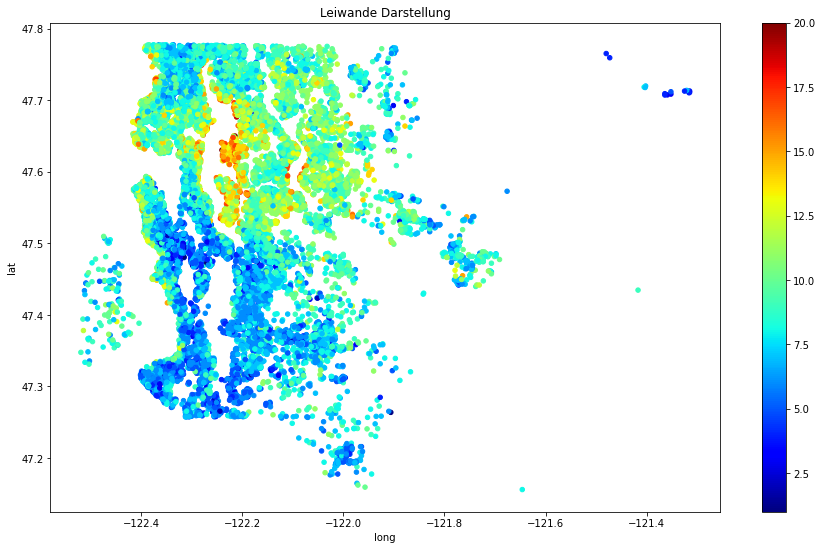

In [6]:
data.plot(kind="scatter", x="long", y="lat", grid=False, c = data["price_cat"], cmap="jet",colorbar=True, sharex=False, figsize=(15, 9))

plt.title("Leiwande Darstellung")

plt.show()


### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

Since it is a linear model, the correlation is high positive, when the number is close to 1, and hogh negative, when the number is close to - 1. In the first table the correlation between price and the other variables are seen. 
Best variables to predict in regard to the price: sqft_living, grade, sqft_above. In general the ones with a high correlation. 

In [8]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=True)

zipcode         -0.048113
long             0.017627
condition        0.034385
yr_built         0.051967
sqft_lot         0.088468
yr_renovated     0.106172
floors           0.256034
waterfront       0.263385
bedrooms         0.302203
lat              0.307198
sqft_basement    0.323808
view             0.400077
bathrooms        0.524669
sqft_above       0.606523
grade            0.667485
sqft_living      0.702421
price            1.000000
Name: price, dtype: float64

In [9]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.302203,0.524669,0.702421,0.088468,0.256034,0.263385,0.400077,0.034385,0.667485,0.606523,0.323808,0.051967,0.106172,-0.048113,0.307198,0.017627
bedrooms,0.302203,1.000000,0.511667,0.571046,0.037229,0.174858,-0.010609,0.079345,0.026581,0.351041,0.474870,0.297262,0.156199,0.169473,-0.152025,-0.010514,0.126599
bathrooms,0.524669,0.511667,1.000000,0.752181,0.090238,0.501260,0.061348,0.194567,-0.120934,0.664599,0.682839,0.284466,0.504301,0.537535,-0.196516,0.028220,0.212702
sqft_living,0.702421,0.571046,0.752181,1.000000,0.175225,0.352559,0.105868,0.293780,-0.056732,0.761945,0.876362,0.436922,0.314679,0.340694,-0.193269,0.055915,0.233222
sqft_lot,0.088468,0.037229,0.090238,0.175225,1.000000,-0.002303,0.015058,0.073691,-0.004387,0.112389,0.186194,0.015616,0.052662,0.051315,-0.128400,-0.081997,0.230312
floors,0.256034,0.174858,0.501260,0.352559,-0.002303,1.000000,0.024937,0.033420,-0.262091,0.457630,0.523037,-0.245736,0.486823,0.503573,-0.051419,0.051715,0.118123
waterfront,0.263385,-0.010609,0.061348,0.105868,0.015058,0.024937,1.000000,0.394849,0.013111,0.087864,0.074064,0.081206,-0.024972,0.002155,0.031901,-0.017210,-0.044445
view,0.400077,0.079345,0.194567,0.293780,0.073691,0.033420,0.394849,1.000000,0.043023,0.261345,0.173515,0.285123,-0.054430,-0.017567,0.091193,0.010793,-0.081426
condition,0.034385,0.026581,-0.120934,-0.056732,-0.004387,-0.262091,0.013111,0.043023,1.000000,-0.143433,-0.155730,0.173192,-0.355158,-0.390261,0.001127,-0.020890,-0.101065
grade,0.667485,0.351041,0.664599,0.761945,0.112389,0.457630,0.087864,0.261345,-0.143433,1.000000,0.755355,0.169287,0.443147,0.457892,-0.179469,0.118715,0.192849


Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

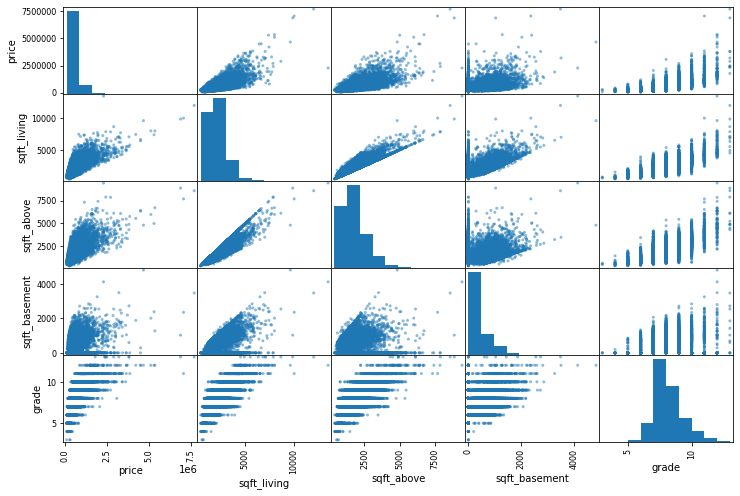

In [10]:
from pandas.plotting import scatter_matrix

attributes =["price", "sqft_living", "sqft_above", "sqft_basement", "grade"] 
scatter_matrix(data[attributes], figsize=(12,8))

plt.show()

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [11]:
#YOUR TASK
data['bedroom_density']= data['bedrooms']/data['sqft_living']
corr_matrix1 = data.corr()
corr_matrix1['price'].sort_values(ascending=False)

price              1.000000
sqft_living        0.702421
grade              0.667485
sqft_above         0.606523
bathrooms          0.524669
view               0.400077
sqft_basement      0.323808
lat                0.307198
bedrooms           0.302203
waterfront         0.263385
floors             0.256034
yr_renovated       0.106172
sqft_lot           0.088468
yr_built           0.051967
condition          0.034385
long               0.017627
zipcode           -0.048113
bedroom_density   -0.466269
Name: price, dtype: float64

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [12]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

One option would be to replace the missing values with Simplelmputer. Another option would be to exclude the instance with the missing value. So if a house misses the long, exclude the whole house.

Simplelmputer(strategy="median") replaces all missing values with the median.

In [13]:
#YOUR TASK: Write a code that give all lines, which have any missing value. 


missing_variables = data[data.isna().any(axis=1)]

missing_variables


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_cat


###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

Ordinal categorical data: When the data is ordered and non-numerical. It has an order or a ranking. For example: super smart, smart, dumb.

waterfront, zipcode are categorical, grade, condition are ordinal. 


We can encode the categorical variables with OneHotEncoder() into one-hot vectors. 

Dummy attributes are attributes which come out of the OneHotEncoder(). 

With OneHotEncoder() all the values of waterfront are set to 0 except one will be set to 1. 


In [14]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

waterfront = data[['waterfront']]

waterfront_encoded = cat_encoder.fit_transform(waterfront)

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

Min-Max scaling: For each attribute the value is shifted and trescaled to a range between 0 and 1. This is performed by subtracting the min value and dividing by the difference between the min and the max.

Standardization: Firss the mean value is subtracted, this result is then devided by the standard deviation. 

Heavy tail: When values far from the mean are not exponentially rare(Right skewed).

Problem with min-max/standardization: Both min-max scaling and standardization will squash most values into a small range. 

In [15]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'price_cat'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

waterfront: onehotencoding

date: -

The KMeans algorithm is used to cut the data in 15 clusters based on the price.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


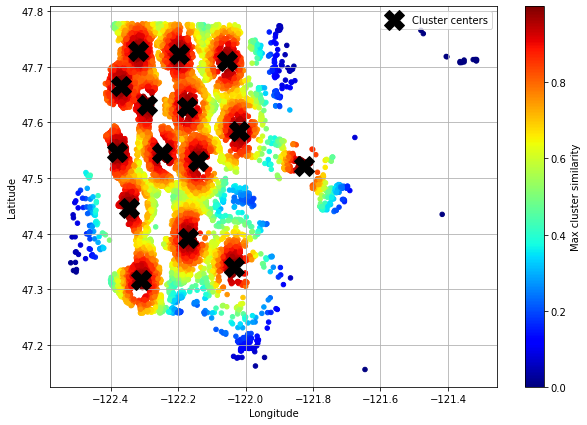

In [17]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

log:  log + Standartdization

geo: cluster 

cat: One-hot-encoded

date: log + Standardization

normal: Standarization

log: log

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

We have 31 features.

In [19]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(17290, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

The data is processed by the transformation pipeline. After that, a linear Regression model is applied. 

In [20]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

The predicted and calculated median are very similar. The median absolute erreo indicates that the average prediction is 50330 off. The mean squared error is 150089, compared to the median this is kind of far off. 

In [21]:
# Your task
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

RootMSE = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared=False)
rounded_RMSE = round(RootMSE, 3)
mae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))
rounded_mae = round(mae, 3)

median_cast = np.median(np.exp(data_predictions))
rounded_median_cast = round(median_cast, 3)
median_calculated = np.median(np.exp(data_label_transformed))
rounded_median_calculated = round(median_calculated, 3)

print("Root mean squared error", rounded_RMSE)
print("MEdian absolute error", rounded_mae)
print("Predicted median", rounded_median_cast)
print("calculated median", rounded_median_calculated)



Root mean squared error 150089.405
MEdian absolute error 50330.343
Predicted median 456734.52
calculated median 450000.0


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

The data is randomly split into 10 datasets. The decision tree model is then trained 10 times (with 9 of the 10 sets as training material and the final set as test set). 

The np.ravel returns a flattened one dimensional array of the input array. 

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

KeyboardInterrupt: ignored

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -132458.760257
std       11841.615386
min     -150282.898118
25%     -136612.811386
50%     -133015.036905
75%     -130023.325978
max     -110631.033711
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

Grid search: Defining a grid of hyperparameter values and searching over that grid to find the set of hyperparameters that result in the best performance of the model.

Random search: Specifying a range or distribution for each hyperparameter and the algorithm randomly selects hyperparameters from those ranges or distributions.

If grid search is used, there is a certain control over the searching radius. On the other hand random search might cover a larger area.



###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
# Your TASK
Xtest = test_set.drop("price", axis=1)
ytest = test_set[["price"]].copy()

test_label_transformed = preprocessing_label.fit_transform(ytest)

final_predictions = forest_reg.predict(Xtest)

RootMSE = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared=False)
rounded_RMSE = round(RootMSE, 3)
mae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))
rounded_mae = round(mae, 3)

median_cast = np.median(np.exp(data_predictions))
rounded_median_cast = round(median_cast, 3)
median_calculated = np.median(np.exp(data_label_transformed))
rounded_median_calculated = round(median_calculated, 3)

print("Root mean squared error", rounded_RMSE)
print("MEdian absolute error", rounded_mae)
print("Predicted median", rounded_median_cast)
print("calculated median", rounded_median_calculated)

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Root mean squared error 150089.405
MEdian absolute error 50330.343
Predicted median 456734.52
calculated median 450000.0


##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

We can use joblib

A monitoring code is used to check if a model performs as well on new data as it did on the known data. 

In [ ]:
# Your task

import joblib

joblib.dump(forest_reg, "forest_model_on_housing_prices_in_kansas")

['forest_model_on_housing_prices_in_kansas']

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 